In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crowd-counting/images.npy
/kaggle/input/crowd-counting/labels.npy
/kaggle/input/crowd-counting/labels.csv
/kaggle/input/crowd-counting/frames/frames/seq_000094.jpg
/kaggle/input/crowd-counting/frames/frames/seq_001420.jpg
/kaggle/input/crowd-counting/frames/frames/seq_001778.jpg
/kaggle/input/crowd-counting/frames/frames/seq_001251.jpg
/kaggle/input/crowd-counting/frames/frames/seq_001273.jpg
/kaggle/input/crowd-counting/frames/frames/seq_000295.jpg
/kaggle/input/crowd-counting/frames/frames/seq_001958.jpg
/kaggle/input/crowd-counting/frames/frames/seq_001230.jpg
/kaggle/input/crowd-counting/frames/frames/seq_001086.jpg
/kaggle/input/crowd-counting/frames/frames/seq_001595.jpg
/kaggle/input/crowd-counting/frames/frames/seq_000146.jpg
/kaggle/input/crowd-counting/frames/frames/seq_000477.jpg
/kaggle/input/crowd-counting/frames/frames/seq_000889.jpg
/kaggle/input/crowd-counting/frames/frames/seq_001591.jpg
/kaggle/input/crowd-counting/frames/frames/seq_000115.jpg
/kaggle/in

In [29]:
!pip install -q ultralytics opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 64.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 83.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 61.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 29.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
!pip install protobuf==3.20.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 4.3 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.33.0
    Uninstalling protobuf-6.33.0:
      Successfully uninstalled protobuf-6.33.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
opentelemetry-proto 1.37.0 requires protobuf<7.0,>=5.0, but you have protobuf 3.20.3 which is incompatible.
onnx 1.18.0 requires protobuf>=4.25.1, but you have protobuf 3.20.3 which is incompatible.
a2a-sdk 0.3.10 requires protobuf>=5.29.5, but you have protobuf 3.20.3 which is incompatible.
ray 2.51.1 requires click!=8.3.0,>=7.0, but you have click 8.3.0 which is incompatible.
bigframes 2.12.0 requires rich<14,>=12.4.4, but you have rich 14.2.0 which is incompatible.
tens

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, optimizers, callbacks

In [14]:
img = np.load('/kaggle/input/crowd-counting/images.npy')  # shape: (N, H, W, C)
df = pd.read_csv('/kaggle/input/crowd-counting/labels.csv')
print(f'CSV columns: {df.columns}')                      # Show what columns exist
print(df.head())                                         # View sample rows

CSV columns: Index(['id', 'count'], dtype='object')
   id  count
0   1     35
1   2     41
2   3     41
3   4     44
4   5     41


In [15]:
label_col = [col for col in df.columns if df[col].dtype != 'object' and col.lower() != 'id'][0]
print(f'Using {label_col} as label column.')
labels = df[label_col].values

Using count as label column.


In [8]:
print('Image shape:', img.shape)
print('Labels shape:', labels.shape)

Image shape: (2000, 480, 640, 3)
Labels shape: (2000,)


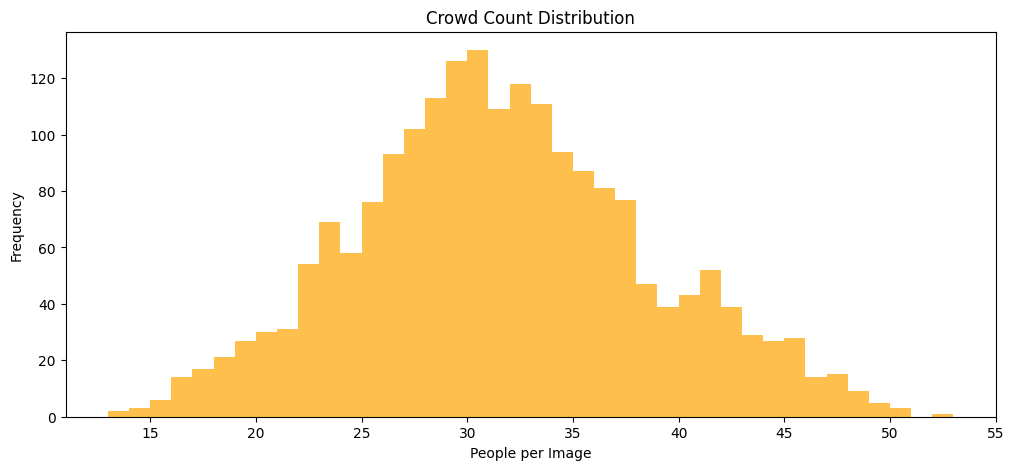

In [16]:
plt.figure(figsize=(12,5))
plt.hist(labels, bins=40, color='orange', alpha=0.7)
plt.title('Crowd Count Distribution')
plt.xlabel('People per Image'); plt.ylabel('Frequency')
plt.show()

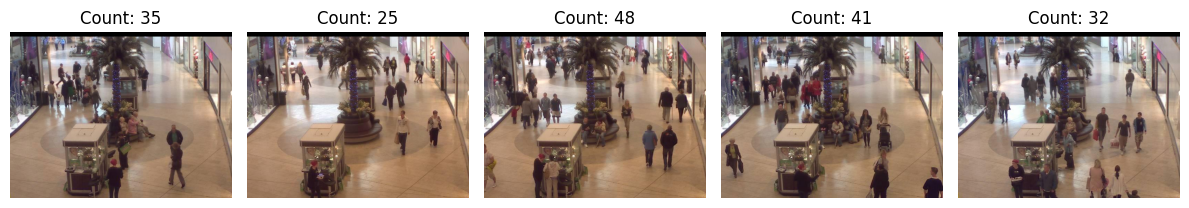

In [17]:
plt.figure(figsize=(12,5))
idx = np.random.choice(len(img), 5, replace=False)
for i, j in enumerate(idx):
    plt.subplot(1,5,i+1)
    plt.imshow(img[j].astype(np.uint8))
    plt.title(f'Count: {labels[j]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(img, labels, test_size=0.12, random_state=42)

In [19]:
input_shape = X_train.shape[1:]
model = models.Sequential([
    layers.Input(shape=input_shape),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.22),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1) # crowd count regression
])

In [20]:
model.compile(
    loss=tf.keras.losses.Huber(),
    optimizer=optimizers.Adam(learning_rate=0.001),
    metrics=['mae', 'mse']
)
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 478, 638, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 239, 319, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 237, 317, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 118, 158, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 116, 156, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 58, 78, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 58, 78, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 579072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 120)            │    69,488,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 69,582,129 (265.43 MB)

 Trainable params: 69,582,129 (265.43 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
early_stop = callbacks.EarlyStopping(patience=8, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(factor=0.5, patience=4, min_lr=1e-6)
lr_monitor = callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 0.93**epoch)

In [22]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    callbacks=[early_stop, reduce_lr, lr_monitor],
    verbose=2
)

Epoch 1/30


I0000 00:00:1762509234.231026     134 service.cc:148] XLA service 0x7e204c004b80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1762509234.231950     134 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1762509234.231973     134 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1762509234.583746     134 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-11-07 09:54:06.122740: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[32,32,239,319]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,64,237,317]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardInput", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","

55/55 - 52s - 946ms/step - loss: 258.4267 - mae: 258.9162 - mse: 2276347.5000 - val_loss: 6.5386 - val_mae: 7.0293 - val_mse: 67.8083 - learning_rate: 0.0010
Epoch 2/30
55/55 - 15s - 278ms/step - loss: 5.9459 - mae: 6.4270 - mse: 66.8370 - val_loss: 3.4901 - val_mae: 3.9600 - val_mse: 23.3216 - learning_rate: 9.3000e-04
Epoch 3/30
55/55 - 16s - 285ms/step - loss: 5.1016 - mae: 5.5815 - mse: 49.8812 - val_loss: 2.3060 - val_mae: 2.7727 - val_mse: 12.0654 - learning_rate: 8.6490e-04
Epoch 4/30
55/55 - 16s - 283ms/step - loss: 4.6565 - mae: 5.1344 - mse: 43.3754 - val_loss: 2.6526 - val_mae: 3.1236 - val_mse: 15.1637 - learning_rate: 8.0436e-04
Epoch 5/30
55/55 - 16s - 282ms/step - loss: 4.7503 - mae: 5.2305 - mse: 45.4881 - val_loss: 2.2354 - val_mae: 2.7023 - val_mse: 11.7939 - learning_rate: 7.4805e-04
Epoch 6/30
55/55 - 15s - 270ms/step - loss: 4.4742 - mae: 4.9489 - mse: 40.9452 - val_loss: 2.3505 - val_mae: 2.8135 - val_mse: 13.0094 - learning_rate: 6.9569e-04
Epoch 7/30
55/55 - 15s

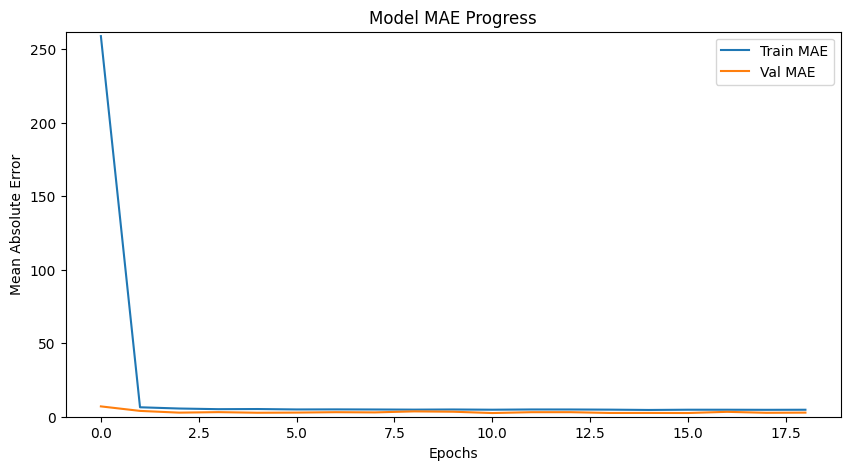

In [23]:
plt.figure(figsize=(10,5))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.xlabel('Epochs'); plt.ylabel('Mean Absolute Error')
plt.title('Model MAE Progress')
plt.legend(); plt.ylim(0, max(history.history['mae'])+3)
plt.show()

In [24]:
preds = model.predict(X_test).flatten()
mae = np.mean(np.abs(preds - y_test))
mse = np.mean((preds - y_test)**2)

print(f'Test MAE: {mae:.2f}, Test MSE: {mse:.2f}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step
Test MAE: 2.50, Test MSE: 9.86


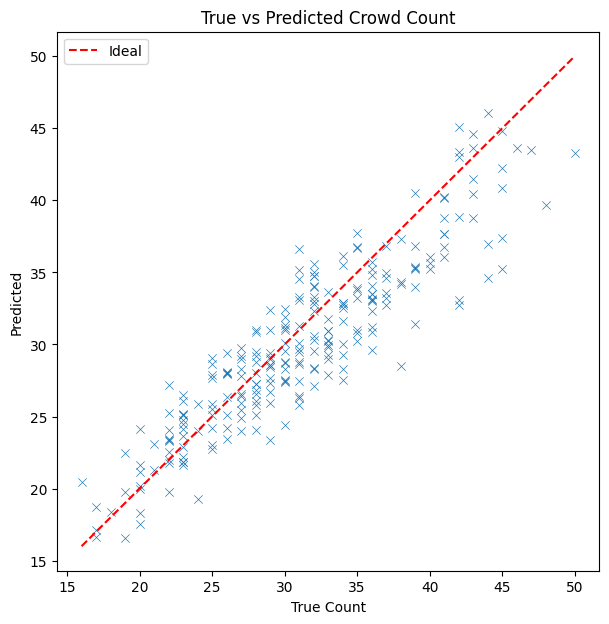

In [25]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=y_test, y=preds, marker='x')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.xlabel('True Count'); plt.ylabel('Predicted')
plt.title('True vs Predicted Crowd Count')
plt.legend(); plt.show()

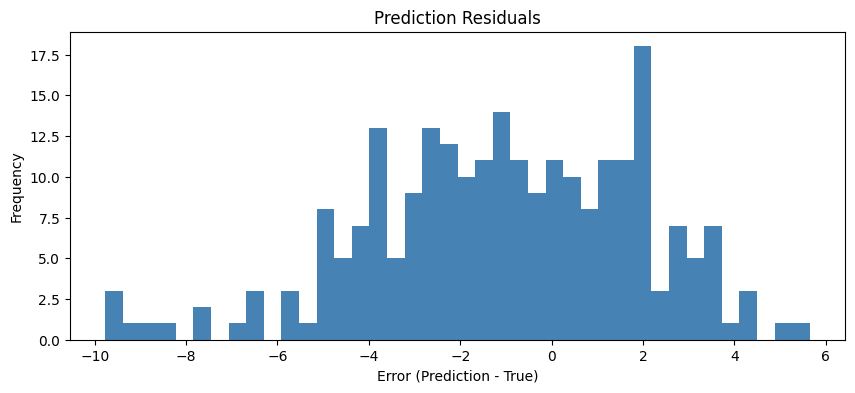

In [26]:
plt.figure(figsize=(10,4))
plt.hist(preds - y_test, bins=40, color='steelblue')
plt.title('Prediction Residuals')
plt.xlabel('Error (Prediction - True)'); plt.ylabel('Frequency')
plt.show()

In [28]:
model.save('my_model.keras')

In [36]:
import numpy as np
import cv2
import os
from IPython.display import Video, display
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

images = np.load('/kaggle/input/crowd-counting/images.npy')
print('Images shape:', images.shape)

assert os.path.exists('my_model.keras'), "Model file my_model.keras not found. Check save path and rerun training cell if needed."
model = load_model('my_model.keras')
model.summary()

VIDEO_PATH = 'crowd_count_demo.mp4'
fps = 7

frame0 = images[0]
if frame0.ndim == 2:
    height, width = frame0.shape
else:
    height, width = frame0.shape[:2]
print('Expecting frames of shape:', (height,width,3))

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(VIDEO_PATH, fourcc, fps, (width, height))

for i, frame in enumerate(images[:80]):
    # Always convert to 3-channel BGR (VideoWriter expects this)
    if frame.ndim == 2 or (frame.ndim == 3 and frame.shape[2] == 1):
        frame_vis = cv2.cvtColor(np.clip(frame,0,255).astype(np.uint8), cv2.COLOR_GRAY2BGR)
    elif frame.shape[2] > 3:
        frame_vis = frame[..., :3]
        frame_vis = np.clip(frame_vis, 0, 255).astype(np.uint8)
    else:
        frame_vis = np.clip(frame, 0, 255).astype(np.uint8)

    # Model prediction
    img_for_pred = frame.astype(np.float32) / 255.
    if img_for_pred.ndim == 2:
        img_for_pred = np.expand_dims(img_for_pred, axis=-1)
    img_for_pred = np.expand_dims(img_for_pred, axis=0)
    count_pred = model.predict(img_for_pred, verbose=0)[0][0]

    text = f'Predicted Count: {int(round(count_pred))}'
    cv2.putText(frame_vis, text, (18,38), cv2.FONT_HERSHEY_SIMPLEX, 1.05, (0, 0, 200), 2)
    cv2.putText(frame_vis, f'Frame {i+1}', (18,70), cv2.FONT_HERSHEY_SIMPLEX, 0.92, (50,150,50), 2)

    # Debug output for each frame
    print(f"Frame {i+1}: shape={frame_vis.shape} min={frame_vis.min()} max={frame_vis.max()}")

    out.write(frame_vis)

out.release()

# Check video file size
print(f'Video file size: {os.path.getsize(VIDEO_PATH)/1024:.1f} KB')
display(Video(VIDEO_PATH, embed=True, width=600))


Images shape: (2000, 480, 640, 3)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 478, 638, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 239, 319, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 237, 317, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 118, 158, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 116, 156, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 58, 78, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 58, 78, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 579072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 120)            │    69,488,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 139,164,260 (530.87 MB)

 Trainable params: 69,582,129 (265.43 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 69,582,131 (265.43 MB)

Expecting frames of shape: (480, 640, 3)
Frame 1: shape=(480, 640, 3) min=0 max=255
Frame 2: shape=(480, 640, 3) min=0 max=255
Frame 3: shape=(480, 640, 3) min=0 max=255
Frame 4: shape=(480, 640, 3) min=0 max=255
Frame 5: shape=(480, 640, 3) min=0 max=255
Frame 6: shape=(480, 640, 3) min=0 max=255
Frame 7: shape=(480, 640, 3) min=0 max=255
Frame 8: shape=(480, 640, 3) min=0 max=255
Frame 9: shape=(480, 640, 3) min=0 max=255
Frame 10: shape=(480, 640, 3) min=0 max=255
Frame 11: shape=(480, 640, 3) min=0 max=255
Frame 12: shape=(480, 640, 3) min=0 max=255
Frame 13: shape=(480, 640, 3) min=0 max=255
Frame 14: shape=(480, 640, 3) min=0 max=255
Frame 15: shape=(480, 640, 3) min=0 max=255
Frame 16: shape=(480, 640, 3) min=0 max=255
Frame 17: shape=(480, 640, 3) min=0 max=255
Frame 18: shape=(480, 640, 3) min=0 max=255
Frame 19: shape=(480, 640, 3) min=0 max=255
Frame 20: shape=(480, 640, 3) min=0 max=255
Frame 21: shape=(480, 640, 3) min=0 max=255
Frame 22: shape=(480, 640, 3) min=0 max=255
